<a href="https://colab.research.google.com/github/jappleyard28/Gymbulum/blob/main/3rdYearProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Third Year Project:** *Voice Emotion Recogition*

---



**Author**: Yan Pfister
**Date**: 07/01/2022

***1 Aim:***
 The main aim of this project is to successfully classify an acted data set of voice lines
into their correct 1 of N emotion categories, by using a machine learning model based
in Python.



***2 This project will be utilising the 'The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)’ data set:***  


*    There are 24 professional actors and 8 emotion categories, furthering Ekmans
’Big Six Emotions’, with the addition of neutral and calm.

*   I will be utilising all 24 actors
in my training and testing stage to to allow for proper cross validation implementation


*   
It roughly holds 25GB worth of
audio files, providing a rich set of data examples to train the emotion classification model






***2.1 The filename identifiers listed from the official RAVDESS website are displayed below:***

*   Modality (01 = full-AV, 02 = video-only, 03 = audio-only)
*   Vocal channel (01 = speech, 02 = song)
*   Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised)
*   Emotional intensity (01 = normal, 02 = strong). KEYNOTE: The 'neutral' emotion does not differ in emotional intensity
*   Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door")
*   Repetition (01 = 1st repetition, 02 = 2nd repetition)
*   Actor (01 to 24. Odd numbered actors are male, even numbered actors are female)








***2.2  For example an audio filename titled '03-02-03-01-01-02-07.mp4', would translate to  holding this meta data:***

*   Audio only (03)
*   Song (02)
*   Happy (03)
*   Normal intensity (01)
*   Statement "Kids" (02)
*   2nd Repetition (01)
*   
7th Actor (07) - Male (as the actor ID number is odd)





**2.3 First must give access to my drive contents, in order for google colab to gain access to it.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
Root = "/content/drive/MyDrive/Colab Notebooks/Ravdess_Speech_Actors"
os.chdir(Root)

In [ ]:
ls '/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24.zip (Unzipped Files)'

Actor_01/  Actor_05/  Actor_09/  Actor_13/  Actor_17/  Actor_21/
Actor_02/  Actor_06/  Actor_10/  Actor_14/  Actor_18/  Actor_22/
Actor_03/  Actor_07/  Actor_11/  Actor_15/  Actor_19/  Actor_23/
Actor_04/  Actor_08/  Actor_12/  Actor_16/  Actor_20/  Actor_24/


**2.4 Installing the librosa library,** it is a very useful librosa python package, mainly utilised for music and audio analysis

In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**3. Import Libraries:**

In [ ]:
import librosa #provides the building blocks necessary to create the music information retrieval systems
import librosa.display
% pylab inline
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import os                # provides functions for creating and removing a directory (folder)
import glob              # (short for global) is used to return all file paths that match a specific pattern
import pandas as pd      # great data analysis and manipulation tool
import soundfile
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score



Populating the interactive namespace from numpy and matplotlib


**3.1 Waveplots Displaying the Eight Emotion Categories from the RAVDESS Data Set**

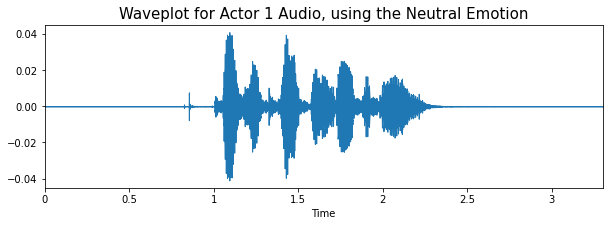

In [ ]:
data, example_audio = librosa.load('/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24.zip (Unzipped Files)/Actor_01/03-01-01-01-01-01-01.wav')
plt.figure(figsize=(10, 3)) #creates an empty plot of the given size
librosa.display.waveplot(data, sr=example_audio)
plt.title('Waveplot for Actor 1 Audio, using the Neutral Emotion'.format(e), size=15)      #creating the plot title
example_audio = '/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24.zip (Unzipped Files)/Actor_01/03-01-01-01-01-01-01.wav'
ipd.Audio(example_audio)

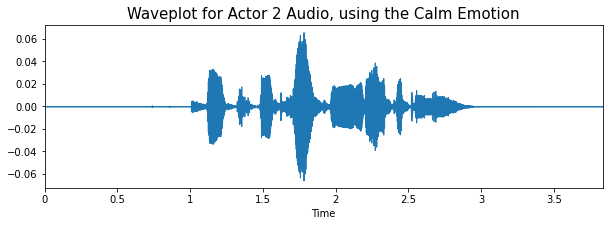

In [ ]:
data, example_audio_two = librosa.load('/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24.zip (Unzipped Files)/Actor_02/03-01-02-01-01-01-02.wav')
plt.figure(figsize=(10, 3)) #creates an empty plot of the given size
librosa.display.waveplot(data, sr=example_audio_two)
plt.title('Waveplot for Actor 2 Audio, using the Calm Emotion'.format(e), size=15)    #creating the plot title
example_audio_two = '/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24.zip (Unzipped Files)/Actor_02/03-01-02-01-01-01-02.wav'
ipd.Audio(example_audio_two)

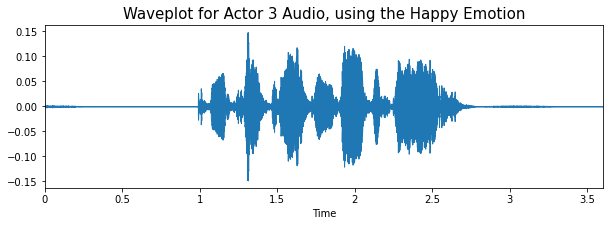

In [ ]:
data, example_audio_three = librosa.load('/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24.zip (Unzipped Files)/Actor_03/03-01-03-01-01-02-03.wav')
plt.figure(figsize=(10, 3)) #this enables the creation of an empty plot of the given size
librosa.display.waveplot(data, sr=example_audio_three)
plt.title('Waveplot for Actor 3 Audio, using the Happy Emotion'.format(e), size=15)    #creating the plot title
example_audio_three = '/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24.zip (Unzipped Files)/Actor_03/03-01-03-01-01-02-03.wav'
ipd.Audio(example_audio_three)

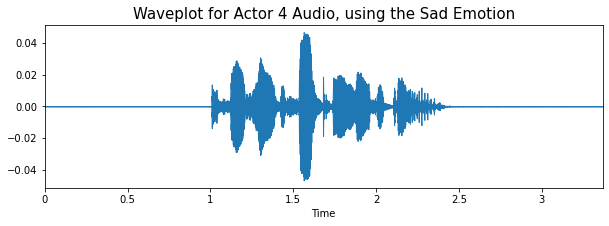

In [ ]:
data, example_audio_four = librosa.load('/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24.zip (Unzipped Files)/Actor_04/03-01-04-01-01-01-04.wav')
plt.figure(figsize=(10, 3)) #this enables the creation of an empty plot of the given size
librosa.display.waveplot(data, sr=example_audio_four)
plt.title('Waveplot for Actor 4 Audio, using the Sad Emotion'.format(e), size=15)     #creating the plot title
example_audio_four = '/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24.zip (Unzipped Files)/Actor_04/03-01-04-01-01-01-04.wav'
ipd.Audio(example_audio_four)

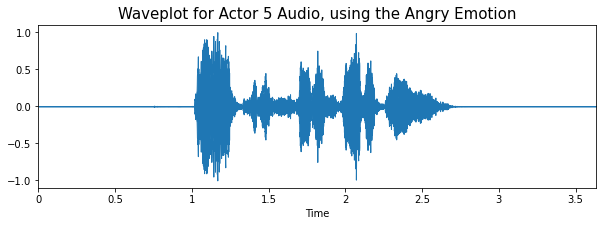

In [ ]:
data, example_audio_five = librosa.load('/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24.zip (Unzipped Files)/Actor_05/03-01-05-02-02-02-05.wav')
plt.figure(figsize=(10, 3)) #this enables the creation of an empty plot of the given size
librosa.display.waveplot(data, sr=example_audio_five)
plt.title('Waveplot for Actor 5 Audio, using the Angry Emotion'.format(e), size=15)     #creating the plot title
example_audio_five = '/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24.zip (Unzipped Files)/Actor_05/03-01-05-02-02-02-05.wav'
ipd.Audio(example_audio_five)

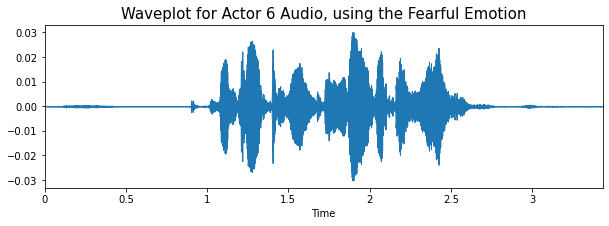

In [ ]:
data, example_audio_six = librosa.load('/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24.zip (Unzipped Files)/Actor_06/03-01-06-01-01-02-06.wav')
plt.figure(figsize=(10, 3)) #this enables the creation of an empty plot of the given size
librosa.display.waveplot(data, sr=example_audio_six)
plt.title('Waveplot for Actor 6 Audio, using the Fearful Emotion'.format(e), size=15)    #creating the plot title
example_audio_six = '/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24.zip (Unzipped Files)/Actor_06/03-01-06-01-01-02-06.wav'
ipd.Audio(example_audio_six)

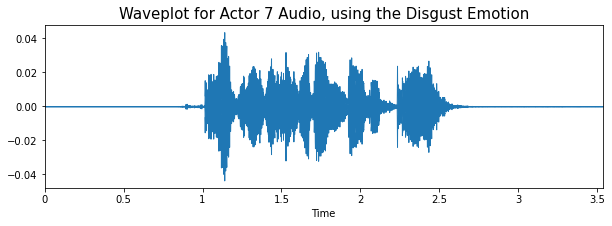

In [ ]:
data, example_audio_seven = librosa.load('/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24.zip (Unzipped Files)/Actor_07/03-01-07-01-02-02-07.wav')
plt.figure(figsize=(10, 3)) #this enables the creation of an empty plot of the given size
librosa.display.waveplot(data, sr=example_audio_seven)
plt.title('Waveplot for Actor 7 Audio, using the Disgust Emotion'.format(e), size=15)  #creating the plot title
example_audio_seven = '/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24.zip (Unzipped Files)/Actor_07/03-01-07-01-02-02-07.wav'
ipd.Audio(example_audio_seven)

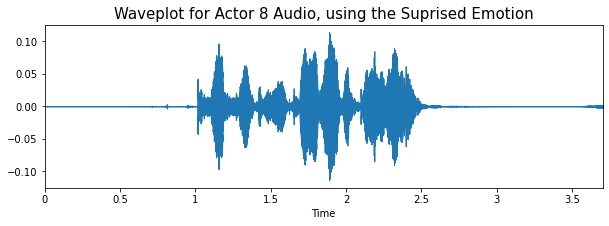

In [ ]:
data, example_audio_eight = librosa.load('/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24.zip (Unzipped Files)/Actor_08/03-01-08-02-01-02-08.wav')
plt.figure(figsize=(10, 3)) #this enables the creation of an empty plot of the given size
librosa.display.waveplot(data, sr=example_audio_eight)
plt.title('Waveplot for Actor 8 Audio, using the Suprised Emotion'.format(e), size=15)   #creating the plot title
example_audio_eight = '/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24.zip (Unzipped Files)/Actor_08/03-01-08-02-01-02-08.wav'
ipd.Audio(example_audio_eight)

***4. Feature Extraction Fundamentals:***

*   Aim of feature extraction or known as the front-end processing, is to take a time-domain
speech signal and transform it into a form suitable for classification

*To explain why we don't just simply utilise the waveforms displayed above for training can be summarised in 2 points*:


*   the ear acts as a frequency analyzer,
therefore a representation that uses frequency is more
helpful
*   Excess of data (even when reduced to 7500
samples/second)










***4.1 Mel Frequent Cepstral Coefficients (MFCC) Feature Extraction:***


*   MFCCs are arugaubly the most frequently used feature in speech
recognition systems

*There are 5 main stages to MFCC Feature Extraction:*


1.   Hamming Window
2.   Spectral Analytsis
3.   Mel-Scale Filterbank
4.   Log
5.   Discrete Cosine Transform (DCT)


*   **The Hamming Window** is applied to the segment of waveform to be analysed
and its shape is designed to minimise spectral distortions.
*    **Spectral analysis** stage receives a frame of speech from the Hamming
window and the speech is assumed to be stationary within this time period
* The magnitude spectrum becomes the **Mel-Scale Filterbank** and then utilise the Mel-Scale coefficients
* **Log** equation (logS( f ) = logG + log E( f ) + logH( f )), and the Log function also serves to compress the amplitudes of the mel-filterbank
coefficients, this results in reducing dynamic range of coefficients
* Apply the **discrete cosine transform** **(DCT)** to the log(Magnitude(Filterbank output)) whilst
discarding the high quefrency coefficients, inorder to retain the vocal tract
information and remove the excitation information


**4.2 Creating the Mel Frequenct Cepstral Coefficients (MFCC) files**, used later for training of classificaiton model

In [ ]:
example_audio = '/content/drive/MyDrive/Colab Notebooks/Audio_Speech_Actors_01-24.zip (Unzipped Files)/Actor_16/03-01-08-02-02-02-16.wav'
singal, sr = librosa.load(example_audio)
singal.shape

(78724,)

In [ ]:
mfccs = librosa.feature.mfcc(singal, n_mfcc=14, sr=sr)
mfccs.shape

(14, 154)

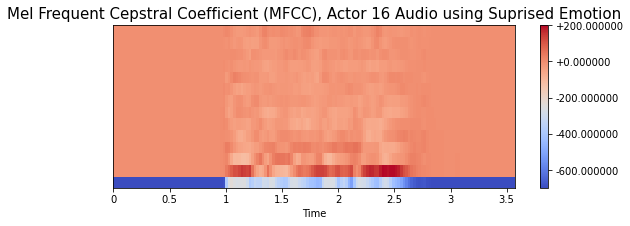

In [ ]:
plt.figure(figsize=(9,3))
librosa.display.specshow(mfccs, x_axis="time", sr=sr)
plt.title('Mel Frequent Cepstral Coefficient (MFCC), Actor 16 Audio using Suprised Emotion'.format(e), size=15)
plt.colorbar(format="%+2f")
plt.show()
ipd.Audio(example_audio)

**4.3 From a sound file, extract the features, consisting of  Chroma, Mel and MFCC**

In [ ]:

def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [ ]:

emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}


observed_emotions=['calm', 'happy', 'fearful','surprised','neutral', 'sad', 'angry','disgust']

In [ ]:
#2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24

def load_data(test_size = 0.2):
  x, y = [], []
  for folder in glob.glob('/content/drive/MyDrive/Colab Notebooks/Ravdess_Speech_Actors/Actor_*'):
    print(folder)
    for file in glob.glob(folder + '/*.wav'):
      file_name = os.path.basename(file)
      emotion = emotions[file_name.split('-')[2]]
      if emotion not in observed_emotions:
        continue
      feature = extract_feature(file, mfcc = True, chroma = True, mel = True)
      x.append(feature)
      y.append(emotion)
  return train_test_split(np.array(x), y, test_size = test_size, random_state = 9)

**5. Cross Validation During the Training Stage**



*   I will be utilising cross validation during the training and testing stage of my model, in order to achieve high realistic classification accuracy when implementing the model onto a funcitoning website adaption
*   The cross validation is advantageous as it is a re-sampling method that includes different portions of the data to test and train a model on different iterations

*   The initial steps would be Mel-frequency cepstral coefficients (MFCCs) feature extraction with the use of librosa functions
*    Viewing this in the perspective of the RAVDESS Data Set, there are 24 professional actors, that each contain their own set of audio files
*   Therefore, for example during the training stage, I would select 16 for training and 4 for testing, this process is then repeated 3 additional times with each iteration swapping out a new order for 4 test actors and 16 training actors speech files
*   This will ensure high classification accuracy, even when the user input is varied, posing a vital step for the app demonstration, as it uses input for testing from various unknown users









In [ ]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

/content/drive/MyDrive/Colab Notebooks/Ravdess_Speech_Actors/Actor_04
/content/drive/MyDrive/Colab Notebooks/Ravdess_Speech_Actors/Actor_03
/content/drive/MyDrive/Colab Notebooks/Ravdess_Speech_Actors/Actor_02
/content/drive/MyDrive/Colab Notebooks/Ravdess_Speech_Actors/Actor_06
/content/drive/MyDrive/Colab Notebooks/Ravdess_Speech_Actors/Actor_07
/content/drive/MyDrive/Colab Notebooks/Ravdess_Speech_Actors/Actor_08
/content/drive/MyDrive/Colab Notebooks/Ravdess_Speech_Actors/Actor_09
/content/drive/MyDrive/Colab Notebooks/Ravdess_Speech_Actors/Actor_10
/content/drive/MyDrive/Colab Notebooks/Ravdess_Speech_Actors/Actor_11
/content/drive/MyDrive/Colab Notebooks/Ravdess_Speech_Actors/Actor_12
/content/drive/MyDrive/Colab Notebooks/Ravdess_Speech_Actors/Actor_13
/content/drive/MyDrive/Colab Notebooks/Ravdess_Speech_Actors/Actor_14
/content/drive/MyDrive/Colab Notebooks/Ravdess_Speech_Actors/Actor_15
/content/drive/MyDrive/Colab Notebooks/Ravdess_Speech_Actors/Actor_16
/content/drive/MyDri

In [ ]:
x_train

array([[-6.86423157e+02,  8.49882736e+01,  4.51600504e+00, ...,
         1.54546598e-08,  7.57922081e-09,  7.42130801e-09],
       [-5.46402161e+02,  7.29353943e+01, -1.26167860e+01, ...,
         8.34204400e-07,  6.03438366e-08,  8.81847750e-09],
       [-6.26660522e+02,  6.69396896e+01,  9.30153465e+00, ...,
         4.94331061e-07,  4.51087665e-08,  1.31196485e-08],
       ...,
       [-6.57450378e+02,  6.25931129e+01,  4.29739666e+00, ...,
         3.30217802e-07,  3.61259893e-08,  7.16898318e-09],
       [-6.38694641e+02,  6.68303146e+01,  5.84168625e+00, ...,
         1.76137206e-07,  2.40071500e-08,  8.53273008e-09],
       [-8.19177124e+02,  6.31665955e+01,  8.68086910e+00, ...,
         5.74582515e-09,  4.90580465e-09,  4.95881292e-09]])

In [ ]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(945, 315)


In [ ]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


**6. Initial Classifier utilising Decision Trees**, using low complexity model as a base line as calssificaiton accuracy will be at its lowest




*   Decision trees are fundamentally a version of predictive modeling, aiding in the process to map the different possible decisions/solutions for a given outcome
*   Decision trees are also a form of supervised machine learning. This is where you inform the algorithm what the input and what the corresponding output is in the training data

*   This consists of decision nodes and leaves, hence the name decision trees.





In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DecTree = DecisionTreeClassifier()

In [ ]:
DecTree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
predictions = DecTree.predict(x_test)

**Results Breakdown:**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       angry       0.53      0.44      0.48        45
        calm       0.51      0.57      0.54        37
     disgust       0.23      0.24      0.23        42
     fearful       0.39      0.37      0.38        38
       happy       0.38      0.36      0.37        47
     neutral       0.27      0.26      0.27        23
         sad       0.26      0.26      0.26        42
   surprised       0.35      0.39      0.37        41

    accuracy                           0.37       315
   macro avg       0.36      0.36      0.36       315
weighted avg       0.37      0.37      0.37       315



In [ ]:
#Predict for the test set
y_pred=DecTree.predict(x_test)

In [ ]:
y_pred

array(['happy', 'sad', 'disgust', 'surprised', 'sad', 'happy',
       'surprised', 'disgust', 'surprised', 'disgust', 'disgust',
       'neutral', 'surprised', 'sad', 'angry', 'disgust', 'sad', 'happy',
       'calm', 'disgust', 'surprised', 'neutral', 'sad', 'happy',
       'fearful', 'disgust', 'sad', 'happy', 'neutral', 'angry', 'sad',
       'fearful', 'fearful', 'disgust', 'sad', 'surprised', 'sad',
       'angry', 'fearful', 'surprised', 'happy', 'surprised', 'disgust',
       'angry', 'calm', 'surprised', 'surprised', 'sad', 'sad', 'happy',
       'fearful', 'surprised', 'happy', 'calm', 'neutral', 'angry',
       'surprised', 'calm', 'fearful', 'calm', 'surprised', 'fearful',
       'angry', 'surprised', 'sad', 'angry', 'disgust', 'angry',
       'surprised', 'disgust', 'sad', 'sad', 'happy', 'sad', 'surprised',
       'sad', 'happy', 'sad', 'angry', 'sad', 'angry', 'happy',
       'surprised', 'calm', 'surprised', 'surprised', 'angry', 'disgust',
       'calm', 'fearful', 'dis

In [ ]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 36.51%


In [ ]:
f1_score(y_test, y_pred,average=None)

array([0.48192771, 0.53846154, 0.23255814, 0.37837838, 0.36956522,
       0.26666667, 0.25882353, 0.36781609])

In [ ]:
import pandas as pd
df=pd.DataFrame({'Original': y_test, 'Predicted':y_pred})
df.head(40)

Original  Predicted
0     disgust      happy
1       happy        sad
2     neutral    disgust
3   surprised  surprised
4     disgust        sad
5       angry      happy
6   surprised  surprised
7     disgust    disgust
8     fearful  surprised
9     fearful    disgust
10    fearful    disgust
11    neutral    neutral
12      angry  surprised
13  surprised        sad
14      angry      angry
15       calm    disgust
16  surprised        sad
17  surprised      happy
18        sad       calm
19      angry    disgust
20      happy  surprised
21  surprised    neutral
22        sad        sad
23      happy      happy
24    fearful    fearful
25    disgust    disgust
26        sad        sad
27        sad      happy
28        sad    neutral
29        sad      angry
30       calm        sad
31  surprised    fearful
32    fearful    fearful
33    fearful    disgust
34    neutral        sad
35    disgust  surprised
36        sad        sad
37      angry      angry
38    fearful    fearful
39    fearful  surprised

**Random Forest Classifier,** should hopefully result in improved classification accuracy over Decision Trees

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RandForest = RandomForestClassifier(criterion='gini',max_depth=10, max_features="log2", max_leaf_nodes= 100, min_samples_leaf= 3, min_samples_split= 20, n_estimators= 22000, random_state=5)

In [ ]:
RandForest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', max_leaf_nodes=100,
                       min_samples_leaf=3, min_samples_split=20,
                       n_estimators=22000, random_state=5)

In [ ]:
predictions = RandForest.predict(x_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       angry       0.68      0.42      0.52        45
        calm       0.40      0.92      0.55        37
     disgust       0.28      0.36      0.32        42
     fearful       0.52      0.45      0.48        38
       happy       0.47      0.43      0.44        47
     neutral       0.50      0.04      0.08        23
         sad       0.37      0.24      0.29        42
   surprised       0.47      0.49      0.48        41

    accuracy                           0.43       315
   macro avg       0.46      0.42      0.39       315
weighted avg       0.46      0.43      0.41       315



**Muti Layer Perceptron Classifier (MLP)**, utilised for the machine learning aspect of training my classification model

In [ ]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
#Predict for the test set
y_pred=model.predict(x_test)

In [ ]:
y_pred

array(['surprised', 'sad', 'happy', 'surprised', 'disgust', 'angry',
       'surprised', 'surprised', 'surprised', 'disgust', 'disgust',
       'happy', 'surprised', 'disgust', 'angry', 'calm', 'surprised',
       'calm', 'sad', 'disgust', 'fearful', 'neutral', 'happy', 'happy',
       'sad', 'disgust', 'sad', 'sad', 'calm', 'fearful', 'calm',
       'disgust', 'sad', 'happy', 'sad', 'disgust', 'sad', 'angry', 'sad',
       'surprised', 'sad', 'surprised', 'happy', 'happy', 'neutral',
       'happy', 'calm', 'sad', 'fearful', 'disgust', 'disgust',
       'surprised', 'surprised', 'disgust', 'calm', 'angry', 'disgust',
       'happy', 'fearful', 'surprised', 'disgust', 'disgust', 'surprised',
       'happy', 'disgust', 'angry', 'surprised', 'fearful', 'angry',
       'surprised', 'happy', 'surprised', 'happy', 'disgust', 'happy',
       'sad', 'surprised', 'happy', 'happy', 'happy', 'angry',
       'surprised', 'surprised', 'surprised', 'sad', 'surprised', 'happy',
       'disgust', 'ca

**Results Breakdown**



In [ ]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 53.33%


In [ ]:
predictions = model.predict(x_test)

In [ ]:
f1_score(y_test, y_pred,average=None)

array([0.66666667, 0.56880734, 0.50746269, 0.50877193, 0.56790123,
       0.35897436, 0.39344262, 0.5       ])

In [ ]:
import pandas as pd
df=pd.DataFrame({'Original': y_test, 'Predicted':y_pred})
df.head(40)

Original  Predicted
0     disgust       calm
1       happy       calm
2     neutral    fearful
3   surprised      happy
4     disgust    disgust
5       angry      angry
6   surprised  surprised
7     disgust    fearful
8     fearful  surprised
9     fearful    disgust
10    fearful    fearful
11    neutral      happy
12      angry  surprised
13  surprised    fearful
14      angry      angry
15       calm       calm
16  surprised    fearful
17  surprised       calm
18        sad    fearful
19      angry    disgust
20      happy    fearful
21  surprised    neutral
22        sad        sad
23      happy      happy
24    fearful    fearful
25    disgust    disgust
26        sad    fearful
27        sad        sad
28        sad       calm
29        sad    fearful
30       calm       calm
31  surprised       calm
32    fearful    fearful
33    fearful    fearful
34    neutral       calm
35    disgust    fearful
36        sad        sad
37      angry      angry
38    fearful       calm
39    fearful    fearful

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       angry       0.85      0.51      0.64        45
        calm       0.53      0.51      0.52        37
     disgust       0.45      0.67      0.54        42
     fearful       0.73      0.42      0.53        38
       happy       0.54      0.68      0.60        47
     neutral       0.12      0.04      0.06        23
         sad       0.51      0.45      0.48        42
   surprised       0.47      0.73      0.57        41

    accuracy                           0.53       315
   macro avg       0.53      0.50      0.49       315
weighted avg       0.55      0.53      0.52       315



**Thank you for reading my project,** it has successfully achieved the set out aim to build an emotion classifier, utilsing machine learning algorithms and is able to recognisie individual emotions correctly.

In [ ]:
!pip install flask-ngrok
!pip install flask-bootstrap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 456 kB 14.9 MB/s 
  Created wheel for flask-bootstrap: filename=Flask_Bootstrap-3.3.7.1-py3-none-any.whl size=460123 sha256=2a5096e4c085746bd72e8f359d69d2e5da028488927e57e7613dbcc253613106
  Stored in directory: /root/.cache/pip/wheels/67/a2/d6/50d039c9b59b4caca6d7b53839c8100354a52ab7553d2456eb
  Created wheel for visitor: filename=visitor-0.1.3-py3-none-any.whl size=3946 sha256=98f4560433262b444d2da884a5faa5e375f37aee8df87591e389a4518e3925ac
  Stored in directory: /root/.cache/pip/wheels/64/34/11/053f47218984c9a31a00f911ed98dda036b867481dcc527a12
Successfully built flask-bootstrap visitor


In [ ]:
from flask import Flask
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def home():
    return "<h1>GFG is great platform to learn</h1>"

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://3c6e-35-204-127-91.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [19/Jun/2022 03:23:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Jun/2022 03:23:35] "GET /favicon.ico HTTP/1.1" 404 -
